# Preliminary Exploration

This notebook performs a preliminary exploration of the data (i.e what we have & what we may need).

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import sys

sys.path.append('../data')
%matplotlib inline

In [2]:
# Reading the labels table & checking distribution of labels
labels = pd.read_csv('../data/driver_imgs_list.csv')
labels.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [3]:
# Checking how many examples we have
labels.shape

(22424, 3)

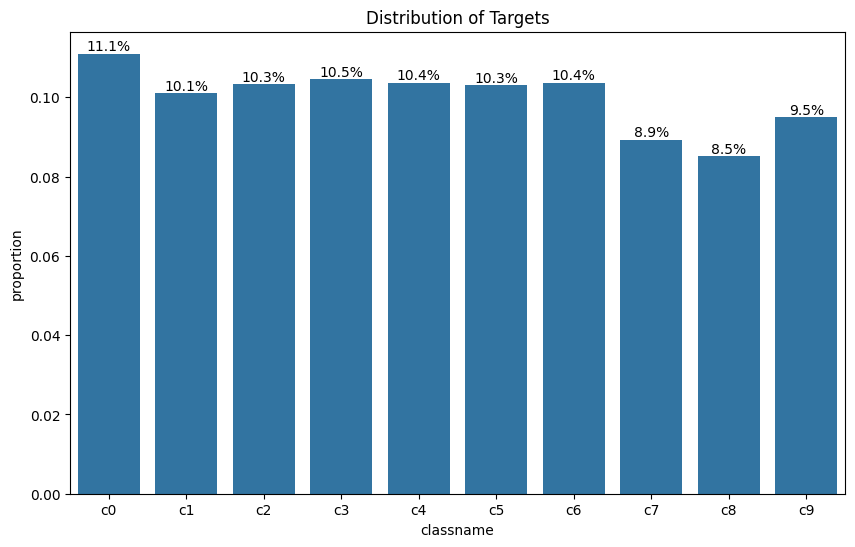

In [4]:
# Checking the target distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=labels, x='classname', orient='x', stat='proportion')
plt.title('Distribution of Targets')

# Calculate proportions
total = len(labels)
for p in ax.patches:
    percentage = f'{100 * p.get_height():.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

img_95172.jpg
c7
reaching behind
(480, 640, 3)


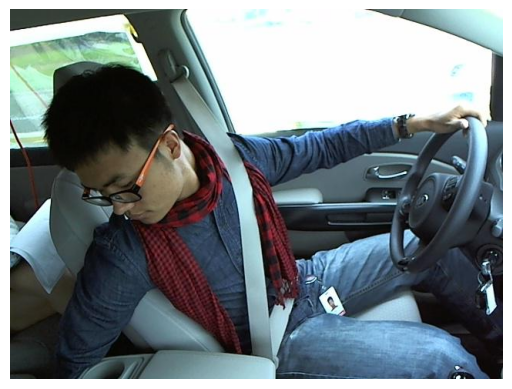

In [5]:
# Getting a random image
class_dicts = {'c0':'safe driving','c1':'texting - right','c2':'talking on the phone - right',
               'c3':'texting - left','c4':'talking on the phone - left','c5':'operating the radio',
               'c6':'drinking','c7':'reaching behind','c8':'hair and makeup','c9':'talking to passenger'}
class_label = np.random.choice(labels['classname'].unique())
random_example = np.random.choice(labels[labels['classname'] == class_label]['img'])
img = cv2.imread(f'../data/imgs/train/{class_label}/{random_example}')

# Converting the image to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plotting the image
print(random_example)
print(class_label)
print(class_dicts[class_label])
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
# Checking the number of drivers
drivers = labels['subject'].unique()
print(f'Total number of drivers: {len(drivers)}')
print(drivers)

Total number of drivers: 26
['p002' 'p012' 'p014' 'p015' 'p016' 'p021' 'p022' 'p024' 'p026' 'p035'
 'p039' 'p041' 'p042' 'p045' 'p047' 'p049' 'p050' 'p051' 'p052' 'p056'
 'p061' 'p064' 'p066' 'p072' 'p075' 'p081']


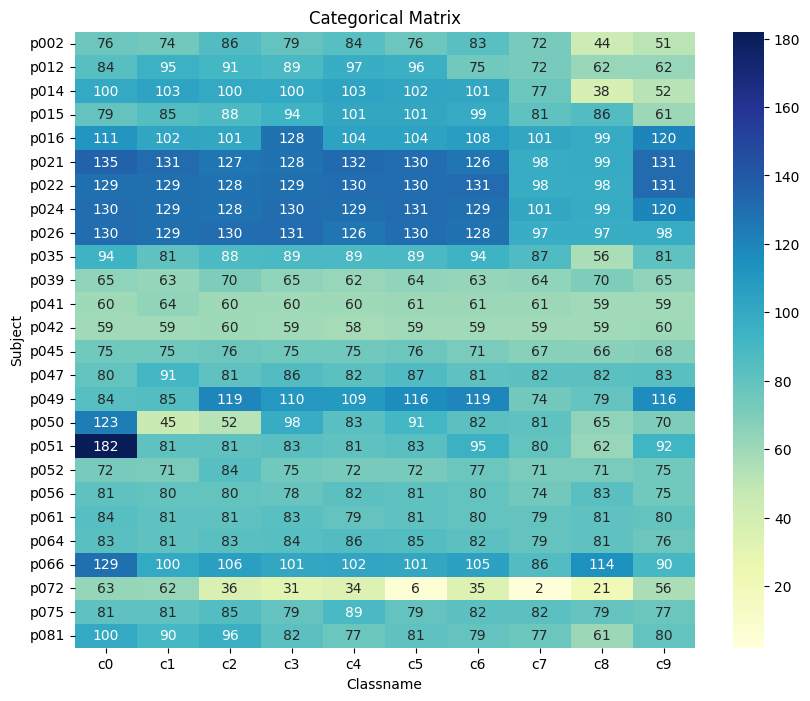

In [7]:
# Plotting a contingency table
table = pd.crosstab(labels['subject'], labels['classname'])
plt.figure(figsize=(10, 8))
sns.heatmap(table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Categorical Matrix')
plt.xlabel('Classname')
plt.ylabel('Subject')
plt.show()

In [8]:
# Getting the value counts of every driver
driver_counts = labels['subject'].value_counts()
driver_counts

subject
p021    1237
p022    1233
p024    1226
p026    1196
p016    1078
p066    1034
p049    1011
p051     920
p014     876
p015     875
p035     848
p047     835
p081     823
p012     823
p064     820
p075     814
p061     809
p056     794
p050     790
p052     740
p002     725
p045     724
p039     651
p041     605
p042     591
p072     346
Name: count, dtype: int64

In [9]:
# Splitting the data into training and validation
training_drivers = driver_counts[:7].index.tolist()
validation_drivers = driver_counts[7:].index.tolist()
training = labels[labels['subject'].isin(training_drivers)]
validation = labels[labels['subject'].isin(validation_drivers)]
training.shape, validation.shape

((8015, 3), (14409, 3))

In [10]:
# Saving both the training and testing data
training.to_csv('../data/training.csv', index=False)
validation.to_csv('../data/validation.csv', index=False)